<a href="https://colab.research.google.com/github/cahmtoledo/RVWorks/blob/master/EP3_Cah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Veja a solução no github](https://github.com/cahmtoledo/RVWorks/blob/master/EP3.ipynb)

v - voltagem através da membrana

w -  descreve a condutividade dinâmica de um só tipo de canal iônico

Ponto 1: Faça uma rotina de integralção Tunge-Kutta-Fehlberg de quinta-quarta ordem e use-a para integrar sistema de equações. Apresente o código num apêndice.

Ponto 2: Comece a integrar com I=0 e integre as equações para que o sistema entre em equilíbrio. A partir desse ponto faça então a corrente diferente de zero. 

Estude o efeito de valores e I entre I = .04\muA e .2\muA.

Não faça 500 gráficos. Estude um conjunto de valores que exemplifique os diferentes comportamentos.

Faça um grádico, no espaço de fases (v,w), das isóclinas nulas (curvas dv/dt = 0 e dw/dt = 0). Nesse mesmo gráfico trace a curva w(v).

Ponto 3: Encontre valores interessantes de I. Em particular: I_{ext-C}, abaixo da qual ainda não há oscilações persistentes, mas há o disparo de um trem finito de potenciais de ação.

Aumentando ainda mais a corrente aparece outro ponto I_H, onde ocorre uma bifurcação de Hopf e o cruzamento das isóclinas nulas não é mais um ponto fixo.

Ponto 4: Escolha uns 4 valores interessantes de I e faça gráficos da evolução temporal de v e w para valores de I = .04\muA até .2\muA.

Ponto 5: Discuta a estabilidade do ponto fixo no cruzamento das isóclinas nulas para os diferentes regimes.

Essas são as bibliotecas que eu utilizei

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


Esses são os dados do enunciado

In [ ]:
eps = .005
a = .5
b = .15
p = 1.0 
I_min = .04 #Corrente mínima
I_max = .2 #Corrente máxima

In [ ]:
def membrane(t, x):
  v=x[0]
  w=x[1]
  dvdt = (1/eps) * (v*(v-a)*(1-v)-w+I)
  dwdt = v-p*w-b
  return [dvdt, dwdt]

Para me familiarizar fiz o caso que I=0

In [ ]:
I=0
x0=[0,0]
solution = solve_ivp(membrane, [0,10], x0)
x=solution.y
t=solution.t


In [ ]:
print(x[0].shape)
print(t.shape)

(119,)
(119,)


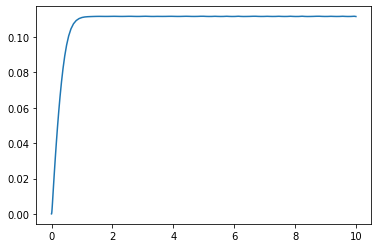

In [ ]:
v = x[0]
w = x[1]

plt.plot(t,v)

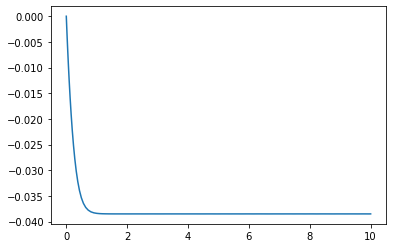

In [ ]:
plt.plot(t,w)

Agora vou generalizar o resultado:

In [ ]:
def solution():
  x0=[0,0]
  solution = solve_ivp(membrane, [0,10], x0)
  x=solution.y
  t=solution.t
  return x, t

In [ ]:
def isoclineV(v):
  return v*(v-a)*(1-v)+I

In [ ]:
def isoclineW(v):
  return (v-b)/p

In [ ]:
def IsoclineCalculus(isov):
  wIsoclineV = []
  wIsoclineW = []
  for i in range(10000):
    wIsoclineV.append(isoclineV(isov[i]))
    wIsoclineW.append(isoclineW(isov[i]))
  return np.asarray(wIsoclineV), np.asarray(wIsoclineW)


Agora vou gerar gráficos para alguns valores de I

In [ ]:
def printVW():
  x, t = solution()
  plt.plot(t, x[0], label="v")
  plt.plot(t, x[1], label="w")
  plt.title("(v,w) X t para I=%.2f" % I)
  plt.legend(loc="upper right")
  plt.savefig("grafico_vwXt_I=%.2f.png" % I)
  return x

In [ ]:
def printIsoclinas(xIso):
  isov = np.linspace(-.2,1,10000)
  isowV, isowW = IsoclineCalculus(isov)
  plt.plot(isov,isowV,label="isoclina V, dv/dt=0")
  plt.plot(isov,isowW, label = "isoclina W, dw/dt=0")
  plt.plot(xIso[0],xIso[1], label="(v,w)")
  plt.title("Iscoclinas para I=%.2f" % I)
  plt.legend(loc="upper right")
  plt.savefig("grafico_vwXt_I=%.2f.png" % I)

In [ ]:
def printEverything():
  x, t = solution()
  fig, axs = plt.subplots(2)
  axs[0].plot(t, x[0], label="v")
  axs[0].plot(t, x[1], label="w")
  axs[0].set_title("(v,w) X t para I=%.2f" % I)
  axs[0].legend(loc="upper right")

  isov = np.linspace(-.2,1,10000)
  isowV, isowW = IsoclineCalculus(isov)
  axs[1].plot(isov,isowV,label="isoclina V, dv/dt=0")
  axs[1].plot(isov,isowW, label = "isoclina W, dw/dt=0")
  axs[1].plot(x[0],x[1], label="(v,w)")
  axs[1].set_title("Iscoclinas para I=%.2f" % I)
  axs[1].legend(loc="upper right")
  
  fig.savefig("GraficosParaI=%.2f.png"%I)
  

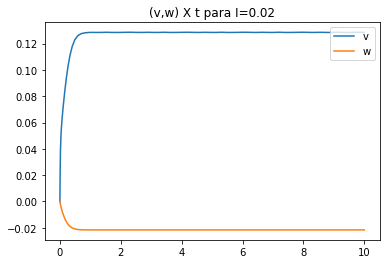

In [ ]:
I=.02
xIso = printVW()

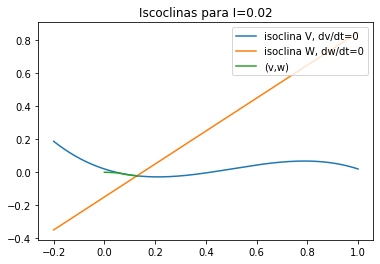

In [ ]:
printIsoclinas(xIso)

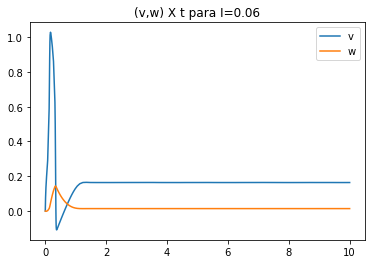

In [ ]:
I=0.06
xIso=printVW()

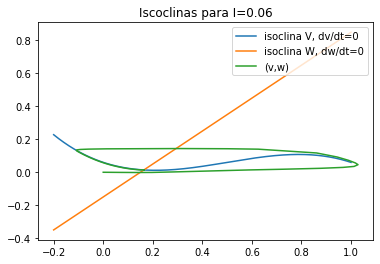

In [ ]:
printIsoclinas(xIso)

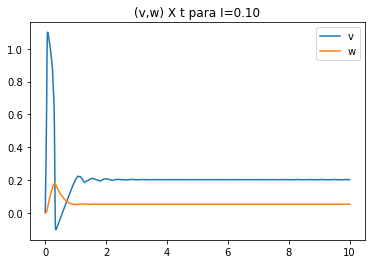

In [ ]:
I=0.1
xIso=printVW()

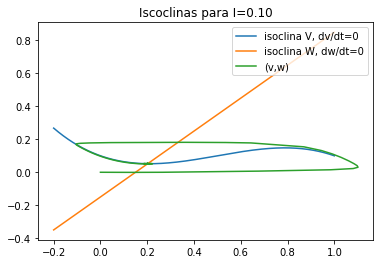

In [ ]:
printIsoclinas(xIso)

Por volta de I=1, um pouco antes, teremos Iext-c onde o potencial começa a oscilar, embora logo dissipe.

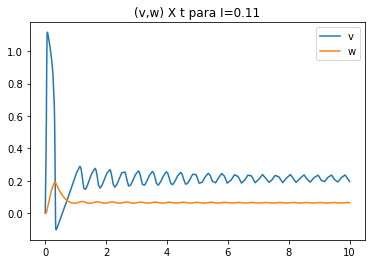

In [ ]:
I=.112
xIso=printVW()

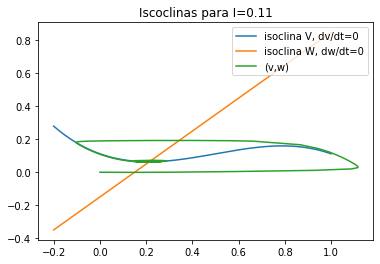

In [ ]:
printIsoclinas(xIso)

Repare que para I=.112 o sistema tende a se estabilizar, porém para I=.113 ele continua oscilando sem dissipar indicando que I=.113 é a bifurcação de Hopf

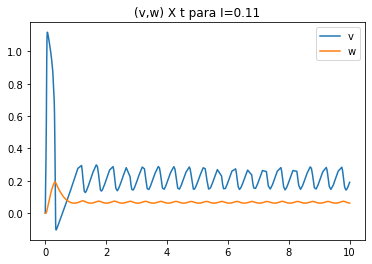

In [ ]:
I=.113
xIso=printVW()

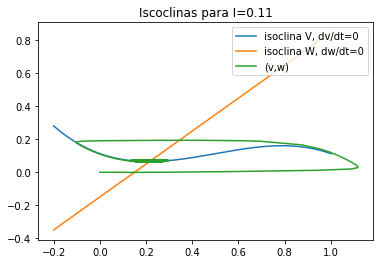

In [ ]:
printIsoclinas(xIso)

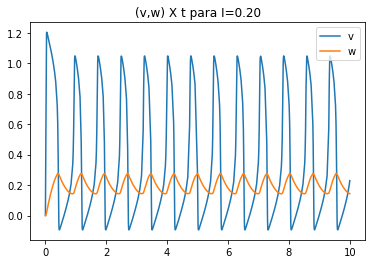

In [ ]:
I=.2
xIso=printVW()

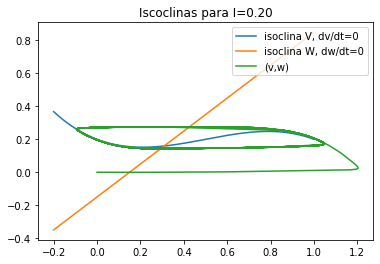

In [ ]:
printIsoclinas(xIso)